In [1]:
import MyFlow as mf
import numpy as np
import Enviornment
from tqdm import tqdm
import testEnv
from IPython.display import clear_output
import time

In [2]:
env = Enviornment.Space2048()

In [3]:
t = mf.GeneticTrainer(env,100,[512,512],[np.tanh,np.tanh,np.tanh,np.tanh],25000,0.1,20,50,1)

In [4]:
t.num_threads = 4

Generation:  45  Top Score:  1460  Time:  12.880166053771973


100%|██████████| 50/50 [06:49<00:00,  8.19s/it]


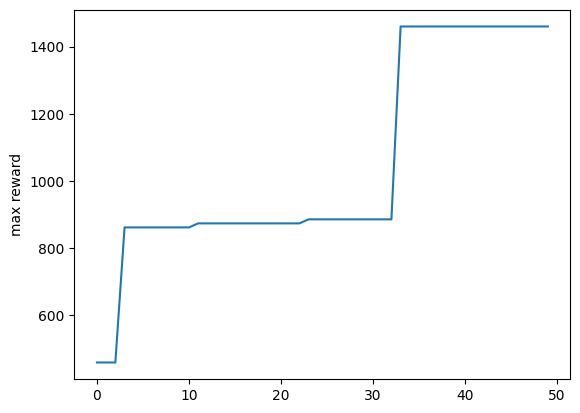

In [5]:
agents = t.train(True,freq=5)